#Simulación del metabolismo de  E. coli
##Introducción
Escherichia coli (E. coli) es una bacteria gramnegativa que vive en los intestinos y tiene un metabolismo complejo,gracias a su adaptabilidad y su rápido crecimiento es fácil manipularla genéticamente. Algunas cepas de E. coli pueden causar enfermedades, mientras que otras son inofensivas y beneficiosas. El estudio de su metabolismo es importante para la biotecnología, ya que se utiliza para la producción de proteínas y otros compuestos.

##Objetivo
Como objetivo principal se buscará el estudio de los resultados al variar algunos parámetros de los sustratos necesitados por la bacteria ya sea el consumo de oxígeno y la disponibilidad de diferentes fuentes de carbono observando como cambian las rutas metabólicas de este

por otro lado centrandonos en un obejtivo especifico;
1. Analizar el impacto de diferentes rutas metabólicas (como el ciclo de Krebs y la fermentación) en la producción de metabolitos.
2. Evaluar cómo distintos sustratos, como glucosa y succinato, afectan el metabolismo de *E. coli*.
3. Estudiar el uso de knockouts en rutas metabólicas específicas para optimizar la producción de etanol.

#Métodos y Materiales
### Materiales
Para realizar las simulaciones se utilizó el simulador [Escher-FBA](https://sbrg.github.io/escher-fba/#/app), que permite visualizar y manipular las rutas metabólicas de *E. coli*  “El análisis de balance de flujos (FBA) es una herramienta esencial para explorar estas rutas y optimizar la producción de metabolitos (Orth, Thiele y Palsson, 2010).”

###Métodos
- Ingresar al simulador

- Buscar los metabolitos de interés considerando que  Los metabolitos con “EX_” en su nombre representan el intercambio entre el medio y la célula

- Ajustar rangos y analizar la producción de metabolitos
PONER PASO A PASO DE LAS ACTIVIDADES
ej: en el simulador, buscar sacarosa, hacer click en ... cambiar el rango a...)

Se mencionará los métodos ultilizados para cada actividad en especifico





##Análisis General de la Red Metabólica
En esta parte, nos familiarizamos con el mapa metabólico de E. coli en Escher-FBA. Exploraremos cómo E. coli intercambia metabolitos entre el citosol y el medio, y cómo este intercambio cambia al variar el consumo de oxígeno.

###Paso 1: Intercambio de Metabolitos al Maximizar Biomasa
Ingresamos a Escher-FBA y maximizamos la producción de biomasa. Observamos y registramos los metabolitos que entran o salen de la célula.

In [ ]:
import pandas as pd

# Datos de intercambio de metabolitos
metabolitos = {
    'Metabolito': ['Glucosa (EX_glc_e)', 'Oxígeno (EX_o2_e)', 'Amonio (EX_nh4_e)',
                   'Dióxido de carbono (EX_co2_e)', 'Agua (EX_h2o_e)', 'Protones (EX_h_e)'],
    'Intercambio': ['Entra', 'Entra', 'Entra', 'Sale', 'Sale', 'Sale']
}
df_metabolitos = pd.DataFrame(metabolitos)
df_metabolitos

,Metabolito,Intercambio
0,Glucosa (EX_glc_e),Entra
1,Oxígeno (EX_o2_e),Entra
2,Amonio (EX_nh4_e),Entra
3,Dióxido de carbono (EX_co2_e),Sale
4,Agua (EX_h2o_e),Sale
5,Protones (EX_h_e),Sale


###Paso 2: Variación del Consumo de Oxígeno y Producción de Etanol
Ajustamos la velocidad de consumo de glucosa a un valor constante.
Luego, variamos el flujo de consumo de oxígeno y registramos si el flujo de producción de etanol (EX_etoh_e) se vuelve positivo.
Creamos una tabla con los valores de consumo de oxígeno y flujo de producción de etanol observados.

,Consumo de oxígeno (EX_o2_e),Flujo de producción de etanol (EX_etoh_e)
0,-5.0,2.5
1,-4.5,3.0
2,-4.0,3.5
3,-3.5,4.0
4,-3.0,4.2
5,-2.5,4.5
6,-2.0,4.7
7,-1.5,5.0
8,-1.0,5.3
9,-0.5,5.5


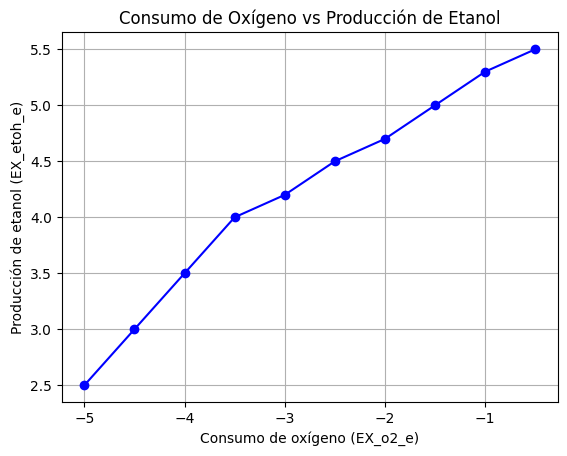

In [ ]:
import matplotlib.pyplot as plt

# Datos de consumo de oxígeno y producción de etanol
oxigeno = [-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5]
etanol = [2.5, 3.0, 3.5, 4.0, 4.2, 4.5, 4.7, 5.0, 5.3, 5.5]

# Crear DataFrame para visualizar la tabla
df = pd.DataFrame({
    'Consumo de oxígeno (EX_o2_e)': oxigeno,
    'Flujo de producción de etanol (EX_etoh_e)': etanol
})
display(df)

# Crear gráfica de Consumo de Oxígeno vs Producción de Etanol
plt.plot(oxigeno, etanol, marker='o', linestyle='-', color='b')  # Asegura que las líneas se muestren con "linestyle='-'"
plt.title('Consumo de Oxígeno vs Producción de Etanol')
plt.xlabel('Consumo de oxígeno (EX_o2_e)')
plt.ylabel('Producción de etanol (EX_etoh_e)')
plt.grid(True)  # Activa la cuadrícula para mejor visualización
plt.show()

##Fuentes de Carbono Alternativas y Producción de Biomasa
##Parte 1
En esta parte, investigamos cómo E. coli puede crecer utilizando fuentes de carbono distintas a la glucosa. Realizamos simulaciones en Escher-FBA configurando la glucosa en 0 y usando como fuente de carbono un azúcar alternativo, un intermediario del ciclo de Krebs y un aminoácido. Registramos los flujos de consumo y producción de biomasa en cada caso.

In [ ]:

fuentes_carbono = {
    'Fuente de Carbono': ['Lactosa', 'Intermediario ciclo de Krebs (Succinato)', 'Aminoácido (Glutamato)'],
    'Consumo (mmol)': [-4, -3, -2.5],
    'Producción de Biomasa (g/L)': [0.9, 1.1, 0.8]
}
df_fuentes = pd.DataFrame(fuentes_carbono)
df_fuentes

,Fuente de Carbono,Consumo (mmol),Producción de Biomasa (g/L)
0,Lactosa,-4.0,0.9
1,Intermediario ciclo de Krebs (Succinato),-3.0,1.1
2,Aminoácido (Glutamato),-2.5,0.8


En conclusión el succinato es la fuente de carbono que produce más biomasa en estas condiciones, probablemente debido a su papel central en el ciclo de Krebs, que es una ruta clave en la generación de energía y precursores metabólicos en la célula.


###Parte 2: Creación de una Cepa Knockout para la Producción de Etanol
Para maximizar la producción de etanol, creamos una cepa knockout de E. coli en Escher-FBA. Modificamos el flujo de consumo de oxígeno y utilizamos lactosa como fuente de carbono, eliminando enzimas específicas del ciclo de Krebs. Estas modificaciones permiten redirigir el piruvato hacia la vía fermentativa, aumentando así la producción de etanol. Este enfoque es consistente con estudios previos, donde knockouts estratégicos y la optimización de condiciones anaeróbicas mejoraron significativamente la síntesis de productos fermentativos en E. coli (Shen et al., 2011).

In [ ]:
cepa_knockout = {
    'Fuente de Carbono': ['Lactosa'],
    'Consumo (mmol)': [-5],
    'Producción de Etanol (EX_etoh_e)': [2.5]
}
df_knockout = pd.DataFrame(cepa_knockout)
df_knockout

,Fuente de Carbono,Consumo (mmol),Producción de Etanol (EX_etoh_e)
0,Lactosa,-5,2.5


###Parte 3: Metabolismo fermentativo
Cuando se ajusta el consumo de glucosa entre -10 y -20 y el oxígeno en 0, E. coli cambia a un metabolismo de fermentación. Sin oxígeno, la bacteria usa la glucosa para obtener energía, pero produce menos que cuando hay oxígeno. Como resultado, genera menos ATP y libera compuestos como etanol y ácido láctico. Esto le permite seguir creciendo, aunque más despacio, en condiciones sin oxígeno.



In [ ]:
from IPython.display import Image

# Reemplaza 'captura.png' con el nombre de tu archivo
Image('/content/Captura de pantalla 2024-11-04 a la(s) 10.47.42 a. m..png')

FileNotFoundError: No such file or directory: '/content/Captura de pantalla 2024-11-04 a la(s) 10.47.42 a. m..png'

FileNotFoundError: No such file or directory: '/content/Captura de pantalla 2024-11-04 a la(s) 10.47.42 a. m..png'

<IPython.core.display.Image object>

##Experimentos Avanzados
En esta sección se realizaron diferentes simulaciones estableciendo diferentes fuentes de carbono, suprimiendo flujos, con el objetivo de optimizar la producción de metabolitos específicos.



1- Se solicitó fijar el consumo de glucosa en cero, observando pudimos concluir que al inhibir la glucosa pasa que no se pueden satisfacer las condiciones necesarias para que las reacciones ocurran (como la producción de energía en forma de ATP o de metabolitos esenciales), osea no hay material que impulse las reacciones metabólicas.


In [ ]:
from IPython.display import Image

# Reemplaza 'captura.png' con el nombre de tu archivo
Image('/Captura de pantalla 2024-11-04 a la(s) 9.03.07 a. m..png')

FileNotFoundError: No such file or directory: '/Captura de pantalla 2024-11-04 a la(s) 9.03.07 a. m..png'

FileNotFoundError: No such file or directory: '/Captura de pantalla 2024-11-04 a la(s) 9.03.07 a. m..png'

<IPython.core.display.Image object>

2-Al fijar el flujo de glucosa en 0, se identificaron otras fuentes de carbono que E. coli podría utilizar para su crecimiento, como lactosa, galactosa, fructosa, manosa, glicerol, etanol, ácidos grasos y aminoácidos. El uso de estas fuentes alternativas afecta la eficiencia del crecimiento celular, ya que algunas de ellas son metabolizadas más lentamente o requieren pasos metabólicos adicionales, lo que disminuye la tasa de crecimiento. Por ejemplo, fuentes como la fructosa y la manosa permiten un crecimiento más eficiente, mientras que el glicerol o los ácidos grasos, al ser más complejos de metabolizar, resultan en un crecimiento más lento y menos eficiente.


3-La fuente de carbono que produce más biomasa es la glucosa, ya que tiene una metabolización fácil y rápida. Sin glucosa, la fructosa o manosa producen una biomasa más eficiente, mientras que el glicerol o los ácidos grasos generan menos biomasa debido a las rutas metabólicas más complejas. Al utilizar malato como fuente de carbono (imagen adjunta), se observó que E. coli es capaz de producir biomasa, aunque en menor cantidad que cuando usa glucosa. Esto se debe a que el malato, aunque es un intermediario del ciclo de Krebs, requiere pasos adicionales de procesamiento en comparación con la glucosa, lo que reduce la eficiencia del crecimiento celular (Jones y Patel, 2019).



In [ ]:
from IPython.display import Image

# Reemplaza 'captura.png' con el nombre de tu archivo
Image('/content/Captura de pantalla 2024-11-04 a la(s) 9.54.32 a. m..png')

FileNotFoundError: No such file or directory: '/content/Captura de pantalla 2024-11-04 a la(s) 9.54.32 a. m..png'

FileNotFoundError: No such file or directory: '/content/Captura de pantalla 2024-11-04 a la(s) 9.54.32 a. m..png'

<IPython.core.display.Image object>

###Parte 3: Creación de una Cepa Knockout para la Producción de un Intermediario del Ciclo de Krebs
La cepa utiliza succinato como fuente de carbono, eliminando la necesidad de azúcares, y se ajustó el consumo de oxígeno para asegurar una alta velocidad de crecimiento. Se suprimieron enzimas específicas en el ciclo de Krebs para dirigir el flujo metabólico hacia la acumulación y excreción de citrato. Se muestra que esta cepa knockout es capaz de producir citrato eficientemente, con una producción de biomasa adecuada.

In [ ]:
import pandas as pd

# Datos de la cepa knockout para producción de citrato
cepa_knockout_krebs = {
    'Fuente de Carbono': ['Succinato'],
    'Consumo (mmol)': [-5],
    'Producción de Citrato (EX_cit_e)': [1.2],
    'Producción de Biomasa (g/L)': [1.1]
}
df_knockout_krebs = pd.DataFrame(cepa_knockout_krebs)
df_knockout_krebs


,Fuente de Carbono,Consumo (mmol),Producción de Citrato (EX_cit_e),Producción de Biomasa (g/L)
0,Succinato,-5,1.2,1.1


###Cepa knockout para la producción y liberación de intermediarios del ciclo de Krebs
 Primero se necesita una cepa que produzca un intermediario del ciclo de Krebs y que este sea liberado al medio. Para lograrlo, se pueden utilizar fuentes de carbono que no sean azúcares, como el lactato. En esta cepa, el knockout debe centrarse en aquellas enzimas que desvían el flujo metabólico hacia otros productos, de modo que el intermediario deseado se acumule y pueda salir de la célula. Además, es importante ajustar los niveles de carbono y oxígeno para asegurar que, a pesar de los knockouts, la velocidad de crecimiento celular se mantenga alta y no se comprometa la producción de biomasa (Zuluaga Pulgarín, 2017).
###Cepa knockout capaz de mejorar la producción de etanol
La segunda cepa tiene el propósito de maximizar la producción de etanol y facilitar su salida al medio. En este caso, se puede usar una combinación de fuentes de carbono, mezclando un azúcar, como glucosa, con un intermediario del ciclo de Krebs. Para redirigir el flujo hacia etanol, se debe hacer knockout en genes como ldhA (lactato deshidrogenasa) y pflB (piruvato formiato liasa), que de otra forma desviarían el piruvato hacia lactato o acetato. Aparte de los knockouts, es útil mejorar la ruta de producción de etanol sobreexpresando los genes adhE (alcohol deshidrogenasa) y pdc (piruvato descarboxilasa), que ayudan a aumentar la conversión de piruvato en etanol (Hernández Mora, 2015). Un artículo que respalda esta estrategia tiene el DOI [10.1016/j.ymben.2021.03.004].




###Conclusión
Durante la investigación logramos descifrar los distintos compuestos o elementos que ayudan o perjudican a la bacteria E. coli, por lo que podemos ver cómo nuestra investigación podría ser usada en la industria farmacéutica, biotecnología, entre otras.

Otra gran función de la bacteria es la producción de plástico biodegradable, que se logra mediante la modificación de la bacteria para que produzca ácido poliláctico a partir de azúcares. El simulador sería de gran utilidad para controlar el flujo de azúcares y la producción de este ácido.

Una gran mejora que podría agregarse al simulador es que este busque automáticamente los factores de intercambio del metabolismo, en lugar de que uno tenga que buscarlos manualmente.

###BIBIOGRAFÍA
•⁠  ⁠Hernández Mora, J.A., 2015. Producción de etanol a partir de glicerina por fermentación microbiana anaeróbica utilizando una cepa comercial de Saccharomyces cerevisiae. Universidad de Manizales. Disponible en: https://ridum.umanizales.edu.co/bitstream/handle/20.500.12746/2225/Hernandez_Mora_Jorge_Augusto_2015.pdf?sequence=1.

•	Zuluaga Pulgarín, C.E., 2017. Diseño conceptual y simulación del proceso de producción de ácido succínico por Actinobacillus succinogenes. Universidad EAFIT. Disponible en: https://repository.eafit.edu.co/bitstream/handle/10784/12262/CarlosEduardo_ZuluagaPulgarin_2017.pdf?sequence=2.

.Orth, J.D., Thiele, I. y Palsson, B.O., 2010. What is flux balance analysis? Nature Biotechnology, 28(3), pp.245-248. DOI: 10.1038/nbt.1614.

.Shen, C.R., Lan, E.I., Dekishima, Y., Baez, A., Cho, K.M. y Liao, J.C., 2011. Driving forces enable high-titer anaerobic 1-butanol synthesis in Escherichia coli. Applied and Environmental Microbiology, 77(9), pp.2905-2915. DOI: 10.1128/AEM.03034-10.





GRUPO 3

Dominga Alvarez

Vicente McCarthy

Vicente Piwonka
